In [1]:
!pip install gdown
!gdown 1KCKfyIGbQi8a7bIYta3LM8dFStxVzVX-  

Downloading...
From (original): https://drive.google.com/uc?id=1KCKfyIGbQi8a7bIYta3LM8dFStxVzVX-
From (redirected): https://drive.google.com/uc?id=1KCKfyIGbQi8a7bIYta3LM8dFStxVzVX-&confirm=t&uuid=4dd5144e-de3c-45f0-959f-1043a11f0ce7
To: /kaggle/working/Shop DataSet.zip
100%|██████████████████████████████████████| 1.78G/1.78G [00:17<00:00, 99.1MB/s]


In [ ]:
!unzip "/kaggle/working/Shop DataSet.zip" -d "/kaggle/working/Shop DataSet"

In [3]:
ls

'Shop DataSet'/  'Shop DataSet.zip'


In [4]:
pwd

'/kaggle/working'

In [5]:
cd /kaggle/working/Shop DataSet/Shop DataSet

/kaggle/working/Shop DataSet/Shop DataSet


In [6]:
ls

'non shop lifters'/  'shop lifters'/


In [3]:
base_path = "/kaggle/working/Shop DataSet/Shop DataSet"

In [1]:
import cv2
import os
import pandas as pd
from tqdm import tqdm

In [4]:
for category in ['non shop lifters', 'shop lifters']:
    category_path = os.path.join(base_path, category)
    print(f"\nIn folder: {category}")
    files = os.listdir(category_path)
    videos = [f for f in files if f.lower().endswith(('.mp4', '.avi', '.mov'))]
    print("Videos found:",len(videos),'Video')



In folder: non shop lifters
Videos found: 527 Video

In folder: shop lifters
Videos found: 323 Video


In [5]:
def extract_video_metadata(base_path):
    data = []
    categories = ['shop lifters', 'non shop lifters']

    for category in categories:
        category_path = os.path.join(base_path, category)
        for video_file in tqdm(os.listdir(category_path), desc=f"Reading {category}"):
            video_path = os.path.join(category_path, video_file)
            cap = cv2.VideoCapture(video_path)
            if not cap.isOpened():
                continue
            fps = cap.get(cv2.CAP_PROP_FPS)
            frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
            duration = frame_count / fps if fps > 0 else None
            width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
            cap.release()

            data.append({
                'filename': video_file,
                'category': category,
                'fps': fps,
                'frame_count': frame_count,
                'duration_sec': duration,
                'width': width,
                'height': height
            })

    df = pd.DataFrame(data)
    return df


In [6]:
video_df = extract_video_metadata(base_path)
video_df.head()


Reading non shop lifters: 100%|██████████| 527/527 [00:01<00:00, 382.06it/s]


,filename,category,fps,frame_count,duration_sec,width,height
0,shop_lifter_127.mp4,shop lifters,25.00,375.0,15.000000,704,576
1,videyyyyyyyyyss_43.mp4,shop lifters,25.00,200.0,8.000000,704,576
2,videppppsss_24.mp4,shop lifters,25.00,425.0,17.000000,704,576
3,videyyyyyyzzzzzyyyss_12.mp4,shop lifters,25.00,375.0,15.000000,704,576
4,shop_lifter_8.mp4,shop lifters,24.75,322.0,13.010101,704,576


In [7]:
video_df.tail()


,filename,category,fps,frame_count,duration_sec,width,height
845,shop_lifter_n_40_1.mp4,non shop lifters,25.00,575.0,23.000000,704,576
846,shop_lifter_n_151.mp4,non shop lifters,25.00,275.0,11.000000,704,576
847,shop_lifter_n_123_1.mp4,non shop lifters,25.00,200.0,8.000000,704,576
848,shop_lifter_n_6.mp4,non shop lifters,25.00,400.0,16.000000,704,576
849,videppppsss_60.mp4,non shop lifters,24.83,447.0,18.002416,704,576


In [8]:
video_df.describe()

,fps,frame_count,duration_sec,width,height
count,850.000000,850.000000,850.000000,850.0,850.0
mean,24.952506,332.781176,13.335595,704.0,576.0
std,0.090838,118.387365,4.737119,0.0,0.0
min,24.750000,150.000000,6.000000,704.0,576.0
25%,25.000000,250.000000,10.028192,704.0,576.0
50%,25.000000,325.000000,13.000000,704.0,576.0
75%,25.000000,396.000000,16.000000,704.0,576.0
max,25.000000,1850.000000,74.000000,704.0,576.0


In [9]:
sum(video_df['duration_sec']<6)#4videos

0

In [10]:
categories = ["shop lifters", "non shop lifters"]
deleted_files = []

for category in categories:
    folder_path = os.path.join(base_path, category)
    for video_name in os.listdir(folder_path):
        video_path = os.path.join(folder_path, video_name)
        cap = cv2.VideoCapture(video_path)

        if not cap.isOpened():
            print(f"Cannot open: {video_path}")
            continue

        fps = cap.get(cv2.CAP_PROP_FPS)
        total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
        duration_sec = total_frames / fps if fps else 0

        cap.release()

        if duration_sec < 6:
            os.remove(video_path)
            deleted_files.append(video_path)

print(f"Deleted {len(deleted_files)} videos shorter than 6 seconds.")


Deleted 0 videos shorter than 6 seconds.


In [11]:
video_df = extract_video_metadata(base_path)

Reading non shop lifters: 100%|██████████| 527/527 [00:01<00:00, 373.38it/s]


In [12]:
sum(video_df['duration_sec']<6)

0

<Axes: title={'center': 'Class Distribution'}, xlabel='category'>

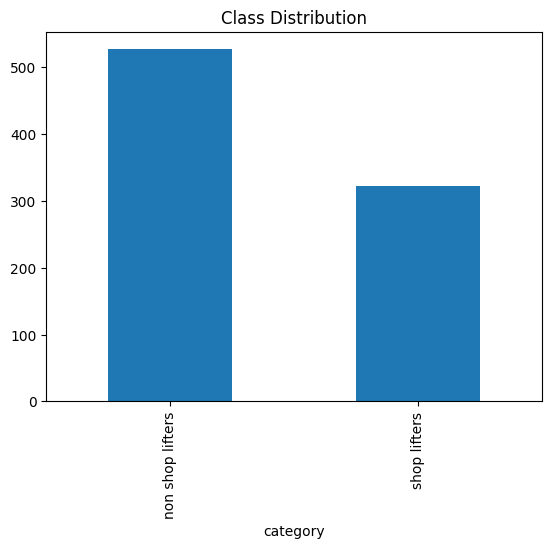

In [18]:
video_df['category'].value_counts().plot(kind='bar', title="Class Distribution")

<Axes: title={'center': 'fps'}, xlabel='category'>

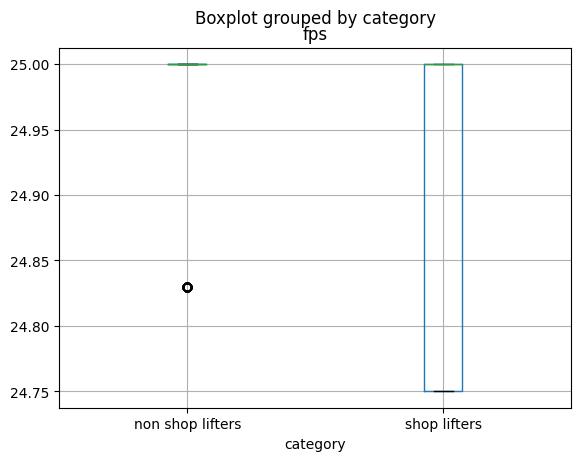

In [13]:
video_df.boxplot(column='fps', by='category')


<Axes: title={'center': 'duration_sec'}, xlabel='category'>

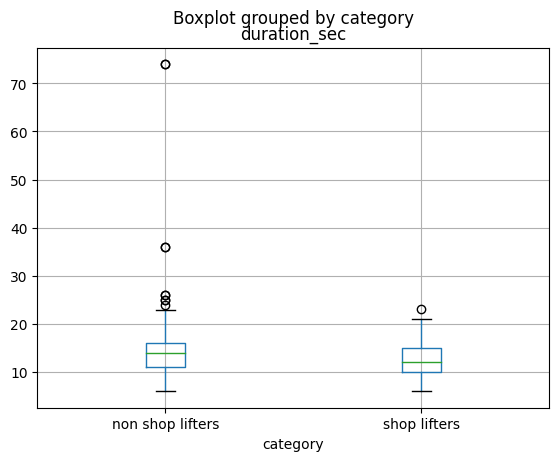

In [14]:
video_df.boxplot(column='duration_sec', by='category')


In [21]:
sum(video_df['duration_sec']>30)

4

<Axes: title={'center': 'Video Resolution Distribution'}, ylabel='resolution'>

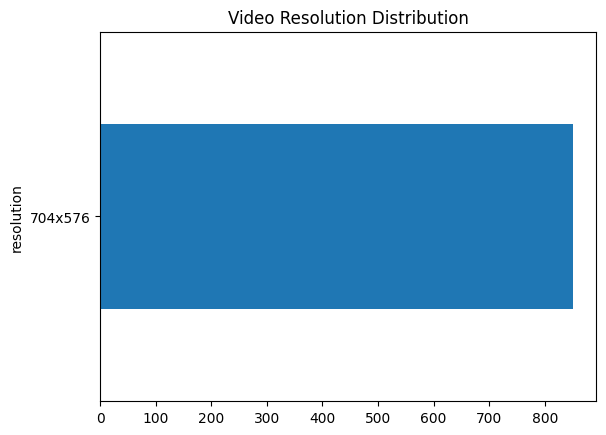

In [22]:
video_df['resolution'] = video_df['width'].astype(str) + 'x' + video_df['height'].astype(str)
video_df['resolution'].value_counts().plot(kind='barh', title="Video Resolution Distribution")


In [17]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Conv3D, MaxPooling3D, LSTM, GRU, Dense, 
                                    Flatten, Dropout, BatchNormalization,
                                    TimeDistributed, Conv2D, Input,
                                    MultiHeadAttention, LayerNormalization)
from tensorflow.keras.callbacks import (EarlyStopping, ModelCheckpoint, 
                                      ReduceLROnPlateau, TensorBoard)
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight


In [18]:
BASE_PATH = "/kaggle/working/Shop DataSet/Shop DataSet"
TARGET_FRAMES = 16  
FRAME_SIZE = (128, 128)  
SKIP_FIRST_SECONDS = 1
SKIP_LAST_SECONDS = 1
BATCH_SIZE = 8
EPOCHS = 30
SEED = 42

random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
def augment_frame(frame):
    if random.random() < 0.5:
        frame = cv2.flip(frame, 1)
    
    if random.random() < 0.3:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)
        s = np.clip(s * random.uniform(0.7, 1.3), 0, 255).astype(np.uint8)
        v = np.clip(v * random.uniform(0.7, 1.3), 0, 255).astype(np.uint8)
        hsv = cv2.merge([h, s, v])
        frame = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    
    if random.random() < 0.2:
        frame = cv2.GaussianBlur(frame, (3, 3), 0)
    
    if random.random() < 0.3:
        angle = random.uniform(-10, 10)
        h, w = frame.shape[:2]
        M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1.0)
        frame = cv2.warpAffine(frame, M, (w, h))
    
    return frame


In [ ]:
def process_video(video_path, target_frames=TARGET_FRAMES, augment=True):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    start_frame = int(fps * SKIP_FIRST_SECONDS)
    end_frame = total_frames - int(fps * SKIP_LAST_SECONDS)
    valid_frames = end_frame - start_frame
    
    if valid_frames < target_frames:
        return None
    
    step = valid_frames // target_frames
    frames = []
    
    for i in range(start_frame, end_frame, step):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
        ret, frame = cap.read()
        if not ret:
            break
            
        frame = cv2.resize(frame, FRAME_SIZE)
        if augment:
            frame = augment_frame(frame)
        frames.append(frame)
        
        if len(frames) == target_frames:
            break
    
    cap.release()
    
    if len(frames) == target_frames:
        return np.array(frames)
    return None

In [19]:
def load_dataset(base_path):
    videos = []
    labels = []
    label_map = {"non shop lifters": 0, "shop lifters": 1}
    
    for category in os.listdir(base_path):
        category_path = os.path.join(base_path, category)
        if not os.path.isdir(category_path):
            continue
            
        label = label_map.get(category)
        if label is None:
            continue
            
        for video_file in os.listdir(category_path):
            if video_file.endswith(".mp4"):
                video_path = os.path.join(category_path, video_file)
                frames = process_video(video_path)
                if frames is not None:
                    videos.append(frames)
                    labels.append(label)
    
    return np.array(videos), np.array(labels)

X, y = load_dataset(BASE_PATH)
print(f"loaded {len(X)} video: {np.bincount(y)}")

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=SEED
)

class_weights = class_weight.compute_class_weight(
    'balanced', classes=np.unique(y_train), y=y_train
)
class_weights = dict(enumerate(class_weights))
print(f"class_weights: {class_weights}")

loaded 850 video: [527 323]
class_weights: {0: 0.8058035714285714, 1: 1.3175182481751824}


In [21]:
def build_3dcnn_model(input_shape):
    model = Sequential([

        Conv3D(32, (3, 3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling3D((1, 2, 2)),
        Dropout(0.2),
        
        Conv3D(64, (3, 3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling3D((2, 2, 2)),
        Dropout(0.3),
        
        Conv3D(128, (3, 3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling3D((2, 2, 2)),
        Dropout(0.4),
        
        Conv3D(256, (3, 3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling3D((1, 2, 2)),
        Dropout(0.5),
        
        Flatten(),
        
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss='binary_crossentropy',
        metrics=['accuracy', 
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall'),
                tf.keras.metrics.AUC(name='auc')]
    )
    
    return model

input_shape = (TARGET_FRAMES, *FRAME_SIZE, 3)
model_3dcnn = build_3dcnn_model(input_shape)
model_3dcnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1754667825.136288      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                 │ (None, 16, 128, 128,   │         2,624 │
│                                 │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 128, 128,   │           128 │
│ (BatchNormalization)            │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 16, 64, 64, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 64, 64, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 16, 64, 64, 64) │        55,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 64, 64, 64) │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 8, 32, 32, 64)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 32, 32, 64)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_2 (Conv3D)               │ (None, 8, 32, 32, 128) │       221,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 32, 32, 128) │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_2 (MaxPooling3D)  │ (None, 4, 16, 16, 128) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 16, 16, 128) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_3 (Conv3D)               │ (None, 4, 16, 16, 256) │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 16, 16, 256) │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_3 (MaxPooling3D)  │ (None, 4, 8, 8, 256)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 8, 8, 256)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,723,713 (132.46 MB)

 Trainable params: 34,721,729 (132.45 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    TimeDistributed, 
    Conv2D, 
    BatchNormalization, 
    MaxPooling2D, 
    Dropout, 
    Flatten, 
    LSTM, 
    Dense
)

def build_cnn_lstm_model(input_shape):
    model = Sequential()
    
    model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu', padding='same'), input_shape=input_shape))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu', padding='same')))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.3)))
    
    model.add(TimeDistributed(Conv2D(128, (3, 3), activation='relu', padding='same')))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.4)))
    
    model.add(TimeDistributed(Flatten()))
    
    model.add(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))
    model.add(LSTM(64, dropout=0.3, recurrent_dropout=0.3))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

model_cnn_lstm = build_cnn_lstm_model(input_shape)
model_cnn_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_13             │ (None, 16, 128, 128,   │           896 │
│ (TimeDistributed)               │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_14             │ (None, 16, 128, 128,   │           128 │
│ (TimeDistributed)               │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_15             │ (None, 16, 64, 64, 32) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_16             │ (None, 16, 64, 64, 32) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_17             │ (None, 16, 64, 64, 64) │        18,496 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_18             │ (None, 16, 64, 64, 64) │           256 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_19             │ (None, 16, 32, 32, 64) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_20             │ (None, 16, 32, 32, 64) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_21             │ (None, 16, 32, 32,     │        73,856 │
│ (TimeDistributed)               │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_22             │ (None, 16, 32, 32,     │           512 │
│ (TimeDistributed)               │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_23             │ (None, 16, 16, 16,     │             0 │
│ (TimeDistributed)               │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_24             │ (None, 16, 16, 16,     │             0 │
│ (TimeDistributed)               │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_25             │ (None, 16, 32768)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 16, 128)        │    16,843,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 16,991,041 (64.82 MB)

 Trainable params: 16,990,593 (64.81 MB)

 Non-trainable params: 448 (1.75 KB)

In [26]:
def get_callbacks(model_name):
    return [
        EarlyStopping(patience=10, monitor='val_loss', mode='min', 
                     restore_best_weights=True, verbose=1),
        ModelCheckpoint(f'best_{model_name}.h5', monitor='val_loss', 
                       save_best_only=True, mode='min'),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, 
                         min_lr=1e-6, verbose=1),
        TensorBoard(log_dir=f'logs/{model_name}')
    ]

In [130]:
history_3dcnn = model_3dcnn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    class_weight=class_weights,
    callbacks=get_callbacks('3dcnn'),
    verbose=1
)

Epoch 1/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 38s 244ms/step - accuracy: 0.5602 - auc: 0.5787 - loss: 0.9220 - precision: 0.4456 - recall: 0.5859 - val_accuracy: 0.3828 - val_auc: 0.7493 - val_loss: 1.5564 - val_precision: 0.3828 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - accuracy: 0.7032 - auc: 0.7801 - loss: 0.6708 - precision: 0.5902 - recall: 0.7646 - val_accuracy: 0.3984 - val_auc: 0.7220 - val_loss: 2.0353 - val_precision: 0.3889 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 12s 136ms/step - accuracy: 0.7454 - auc: 0.8177 - loss: 0.6087 - precision: 0.6366 - recall: 0.7828 - val_accuracy: 0.4922 - val_auc: 0.7346 - val_loss: 1.2907 - val_precision: 0.4200 - val_recall: 0.8571 - learning_rate: 1.0000e-04
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - accuracy: 0.7389 - auc: 0.8617 - loss: 0.5161 - precision: 0.6245 - recall: 0.8019 - val_accuracy: 0.6328 - val_auc: 0.8358 - val_lo

In [131]:
model_3dcnn.evaluate(X_val, y_val, verbose=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.6365 - auc: 0.8575 - loss: 0.8657 - precision: 0.4833 - recall: 0.9781


[0.8593714237213135,
 0.6328125,
 0.510869562625885,
 0.9591836929321289,
 0.835830569267273]

In [27]:
history_cnn_lstm = model_cnn_lstm.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=25,
    batch_size=BATCH_SIZE,
    class_weight=class_weights,
    callbacks=get_callbacks('cnn_lstm'),
    verbose=1
)

Epoch 1/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 68s 361ms/step - accuracy: 0.5264 - loss: 0.7190 - val_accuracy: 0.6562 - val_loss: 0.6737 - learning_rate: 1.0000e-04
Epoch 2/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 27s 298ms/step - accuracy: 0.5886 - loss: 0.6918 - val_accuracy: 0.6094 - val_loss: 0.6758 - learning_rate: 1.0000e-04
Epoch 3/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 27s 296ms/step - accuracy: 0.5152 - loss: 0.6954 - val_accuracy: 0.5000 - val_loss: 0.6915 - learning_rate: 1.0000e-04
Epoch 4/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 27s 297ms/step - accuracy: 0.5957 - loss: 0.6846 - val_accuracy: 0.6094 - val_loss: 0.6791 - learning_rate: 1.0000e-04
Epoch 5/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 27s 298ms/step - accuracy: 0.5718 - loss: 0.6839 - val_accuracy: 0.3906 - val_loss: 0.6926 - learning_rate: 1.0000e-04
Epoch 6/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 29s 315ms/step - accuracy: 0.5653 - loss: 0.6672 - val_accuracy: 0.8281 - val_loss: 0.6184 - learning_rate: 1.0000e-04
Epoch 7/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 28s 310ms/step - acc

In [28]:
model_cnn_lstm.evaluate(X_val, y_val, verbose=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 1.0000 - loss: 0.0043


[0.004546487238258123, 1.0]

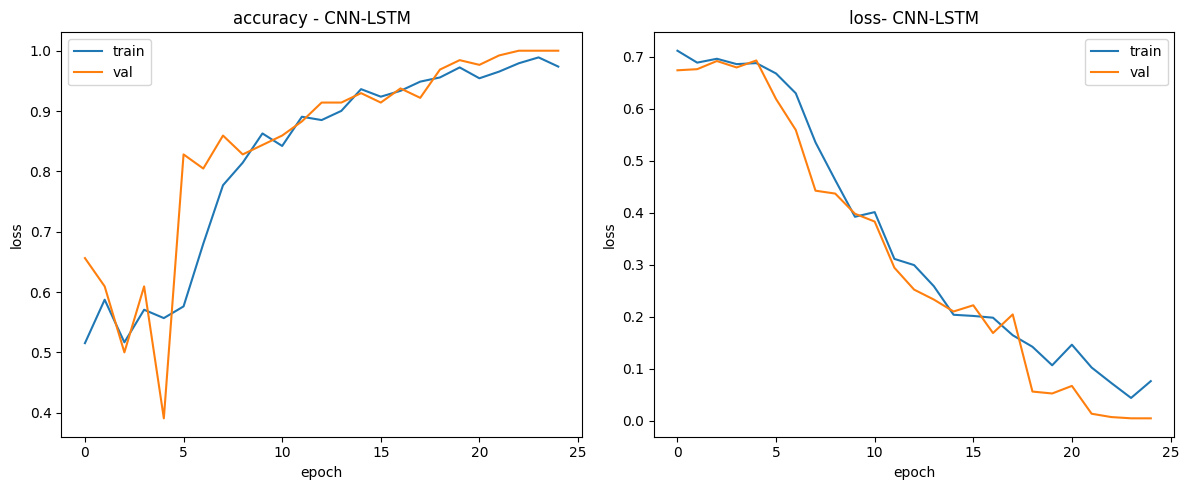

In [30]:
def plot_results(history, model_name):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.title(f'accuracy - {model_name}')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title(f'loss- {model_name}')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

#plot_results(history_3dcnn, '3D CNN')
plot_results(history_cnn_lstm, 'CNN-LSTM')

In [103]:
def compare_models(models, X_val, y_val):
    results = {}
    for name, model in models.items():
        _, acc, precision, recall, auc = model.evaluate(X_val, y_val, verbose=0)
        results[name] = {
            'Accuracy': acc,
            'Precision': precision,
            'Recall': recall,
            'AUC': auc,
            'F1-Score': 2 * (precision * recall) / (precision + recall + 1e-7)
        }
    
    return pd.DataFrame(results).T

models = {
    '3D CNN': model_3dcnn,
    'CNN-LSTM': model_cnn_lstm
}

results_df = compare_models(models, X_val, y_val)
print(results_df)


مقارنة بين أداء النماذج:
          Accuracy  Precision    Recall       AUC  F1-Score
3D CNN      0.6875   0.571429  0.734694  0.782614  0.642857
CNN-LSTM    1.0000   1.000000  1.000000  1.000000  1.000000
